<h1> IAU 3 - Fáza - strojové učenie</h1>
<h2>Vypracovali: Richard Kello (50%) a Dominik Klušák(50%)</h2>

In [386]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from pandas import read_csv
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
from matplotlib import pyplot as plt
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.datasets import make_friedman1
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
import graphviz
import pydot

<h2>Načítanie údajov: (zobrazenie zakladnych informacií)</h2>

In [387]:
test = pd.read_csv("./data/train.csv", sep=",")
test.drop(['Unnamed: 0.1'], axis=1, errors='ignore', inplace=True)
test.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)
train = pd.read_csv("./data/test.csv", sep=",")
train.drop(['Unnamed: 0.1'], axis=1, errors='ignore', inplace=True)
train.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)

In [388]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CFCs     5446 non-null   float64
 1   CO       5446 non-null   float64
 2   C2H3NO5  5446 non-null   float64
 3   NH3      5446 non-null   float64
 4   PM10     5446 non-null   float64
 5   warning  5446 non-null   float64
 6   Pb       5446 non-null   float64
 7   H2CO     5446 non-null   float64
 8   NOx      5446 non-null   float64
 9   PAHs     5446 non-null   float64
 10  CH4      5446 non-null   float64
 11  TEMP     5446 non-null   float64
 12  SO2      5446 non-null   float64
 13  O3       5446 non-null   float64
 14  PM2.5    5446 non-null   float64
dtypes: float64(15)
memory usage: 638.3 KB


In [389]:
train.describe()

CFCs           CO      C2H3NO5          NH3         PM10  \
count  5446.000000  5446.000000  5446.000000  5446.000000  5446.000000   
mean      0.520888     0.462624     0.214902     0.527007     0.533528   
std       0.132520     0.116992     0.073767     0.116660     0.105119   
min       0.143677     0.131770     0.000000     0.195208     0.227305   
25%       0.432025     0.383847     0.160900     0.446960     0.464489   
50%       0.520974     0.462629     0.202566     0.529266     0.534408   
75%       0.610009     0.541780     0.256424     0.606836     0.602503   
max       0.895675     0.793509     0.491106     0.862311     0.841709   

           warning           Pb         H2CO          NOx         PAHs  \
count  5446.000000  5446.000000  5446.000000  5446.000000  5446.000000   
mean      0.596768     0.519752     0.528177     0.598736     0.431313   
std       0.490592     0.126860     0.129297     0.139814     0.120787   
min       0.000000     0.152682     0.161668     0.192629     0.088522   
25%       0.000000     0.434360     0.440388     0.517842     0.351246   
50%       1.000000     0.518641     0.528985     0.621112     0.431216   
75%       1.000000     0.606123     0.615817     0.697065     0.513799   
max       1.000000     0.877836     0.898739     0.972711     0.774000   

               CH4         TEMP          SO2           O3        PM2.5  
count  5446.000000  5446.000000  5446.000000  5446.000000  5446.000000  
mean      0.611217     0.497569     0.458627     0.481409     0.525305  
std       0.103145     0.129909     0.122477     0.112749     0.132281  
min       0.286662     0.128303     0.115147     0.153025     0.154045  
25%       0.555560     0.412205     0.375900     0.405133     0.432082  
50%       0.619463     0.498358     0.458590     0.481342     0.537967  
75%       0.679354     0.585937     0.542230     0.555706     0.621692  
max       0.920275     0.869174     0.809599     0.809780     0.892256

In [390]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3631 entries, 0 to 3630
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CFCs     3631 non-null   float64
 1   CO       3631 non-null   float64
 2   C2H3NO5  3631 non-null   float64
 3   NH3      3631 non-null   float64
 4   PM10     3631 non-null   float64
 5   warning  3631 non-null   float64
 6   Pb       3631 non-null   float64
 7   H2CO     3631 non-null   float64
 8   NOx      3631 non-null   float64
 9   PAHs     3631 non-null   float64
 10  CH4      3631 non-null   float64
 11  TEMP     3631 non-null   float64
 12  SO2      3631 non-null   float64
 13  O3       3631 non-null   float64
 14  PM2.5    3631 non-null   float64
dtypes: float64(15)
memory usage: 425.6 KB


In [391]:
test.describe()

CFCs           CO      C2H3NO5          NH3         PM10  \
count  3631.000000  3631.000000  3631.000000  3631.000000  3631.000000   
mean      0.516265     0.461680     0.216683     0.526703     0.536328   
std       0.131926     0.116942     0.073622     0.119171     0.106760   
min       0.152933     0.132996     0.064159     0.191009     0.230193   
25%       0.425822     0.380494     0.159874     0.444924     0.462564   
50%       0.513529     0.462629     0.205699     0.526774     0.537127   
75%       0.606885     0.541178     0.261337     0.605751     0.608033   
max       0.893967     0.787595     0.491928     0.857221     0.841922   

           warning           Pb         H2CO          NOx         PAHs  \
count  3631.000000  3631.000000  3631.000000  3631.000000  3631.000000   
mean      0.589920     0.517267     0.530674     0.599752     0.430378   
std       0.491916     0.128832     0.129245     0.136289     0.116857   
min       0.000000     0.164664     0.169158     0.193361     0.089025   
25%       0.000000     0.428196     0.441369     0.523312     0.351771   
50%       1.000000     0.518641     0.532047     0.620940     0.431346   
75%       1.000000     0.606912     0.619150     0.693316     0.509117   
max       1.000000     0.879738     0.896202     0.960494     0.772609   

               CH4         TEMP          SO2           O3        PM2.5  
count  3631.000000  3631.000000  3631.000000  3631.000000  3631.000000  
mean      0.610989     0.500288     0.459151     0.479997     0.526998  
std       0.105053     0.128290     0.123241     0.111698     0.130131  
min       0.286569     0.129916     0.109463     0.156152     0.161846  
25%       0.556493     0.408209     0.375750     0.406644     0.435450  
50%       0.620613     0.502490     0.458250     0.480875     0.539985  
75%       0.680560     0.589010     0.542263     0.553252     0.621194  
max       0.902106     0.865060     0.806206     0.807326     0.890356

In [392]:
oneR_data = train.copy()

<h2> 1. Jednoduchý klasifikátor na základe závislosti v dátach </h2>
Vytvorenie oneR algoritmu aby sme dostali sĺpec s najlepšími metrickými hodnotami. 
Náš predpoklad bude že po aplikovaní tohto algoritmu bude atribút s najlepšími metrikami PM2.5 pretože dosahoval
najväčšiu koreláciu k atribútu indicator.

In [393]:
def predict_value(dataframe, column):
    split = dataframe.groupby('warning')[column].mean().mean()
    group = dataframe.groupby(['warning', column]).size()
    left = group.idxmax()[0]
    right = 1 - left
    return split, left, right

def oneR(train, column, data):
    train['temp'] = np.where(train[column] < data[0], data[1], data[2])
    accuracy = accuracy_score(train['warning'], train['temp'])
    precision = precision_score(train['warning'], train['temp'])
    recall = recall_score(train['warning'], train['temp'])
    total=(accuracy + precision + recall) / 3
    train.drop('temp', axis=1, inplace=True)
    return [accuracy, precision, recall, total]

In [394]:
best_accuracy = 0 
for column in oneR_data:
    if column == 'warning':
        continue
    data = predict_value(oneR_data, column)
    accuracy_values = oneR(oneR_data, column, data)
    if accuracy_values[3] > best_accuracy:
        best_column = column
        best_accuracy = accuracy_values[3]
        best_column_metrics = accuracy_values
        
print(' Najlepší atribút z oneR: ' + best_column + '\n',
'Metrika accuracy mala hodnotu: ' + str(best_column_metrics[0]) + '\n',
'Metrika precision mala hodnotu: ' + str(best_column_metrics[1]) + '\n',
'Metrika recall mala hodnotu: ' + str(best_column_metrics[2]) + '\n',
'Metrika total mala hodnotu: ' + str(best_column_metrics[3]))

 Najlepší atribút z oneR: PM2.5
 Metrika accuracy mala hodnotu: 0.6637899375688578
 Metrika precision mala hodnotu: 0.7654320987654321
 Metrika recall mala hodnotu: 0.6295384615384615
 Metrika total mala hodnotu: 0.6862534992909172


<b>Aplikovali sme oneR algoritmus na všetky stĺpce a môžeme vidieť že najlepšie je na tom atribút PM2.5 ako sme predpokladali, 
taktiež je vyššie uvedený popis pre jednotlivé metriky ako accuracy, precision a recall.</b>

In [395]:
def rule1(data):
    data = data.rename(columns={'PM2.5': 'PM25'})
    temp = data[data['warning'].notna()]
    # Compute the confusion matrix using the pandas.crosstab function
    cm = pd.crosstab(temp['warning'], temp['PM25'] > 0.6)

    # Extract the counts from the confusion matrix
    TP = cm[True][0]
    TN = cm[False][1]
    FP = cm[True][1]
    FN = cm[False][0]
    
    values = np.array((temp.apply(lambda row: 0.0 if row.PM25 > 0.6 else 1.0, axis=1)).values.tolist())
    cr = classification_report(temp['warning'], values, target_names = ['0','1'])

    data = data.rename(columns={'PM25': 'PM2.5'})
    print(cr)
    
    return {
        'ALL': data.count()['warning'],
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
    }

              precision    recall  f1-score   support

           0       0.54      0.42      0.47      2196
           1       0.66      0.76      0.71      3250

    accuracy                           0.62      5446
   macro avg       0.60      0.59      0.59      5446
weighted avg       0.61      0.62      0.61      5446



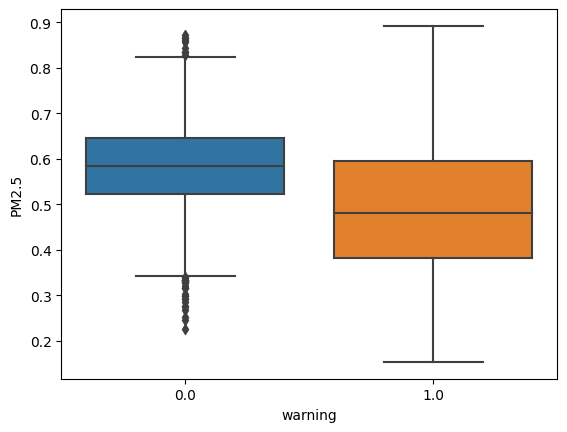

In [396]:
rule1(train)
sns.boxplot(data = train, x = 'warning', y= 'PM2.5');

              precision    recall  f1-score   support

           0       0.56      0.43      0.49      1489
           1       0.66      0.77      0.71      2142

    accuracy                           0.63      3631
   macro avg       0.61      0.60      0.60      3631
weighted avg       0.62      0.63      0.62      3631



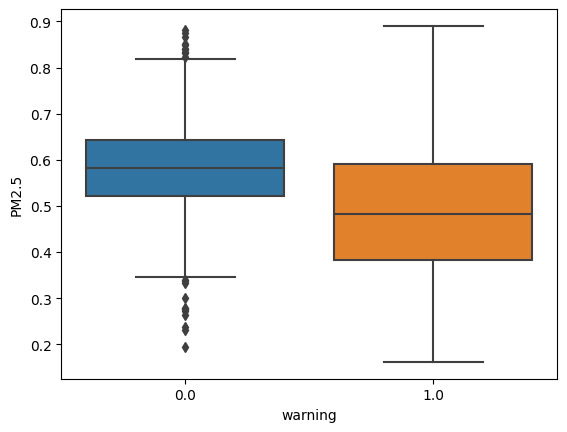

In [397]:
rule1(test)
sns.boxplot(data = test, x = 'warning', y= 'PM2.5');

In [398]:
train_labels = train['warning']
validation_labels = test['warning']

train_class = train.drop('warning', axis=1)
test_class = test.drop('warning', axis=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_class, train_labels)
predicted = clf.predict(test_class)
print("Accuracy:",metrics.accuracy_score(validation_labels, predicted))

Accuracy: 0.8452217020104654


In [399]:
print(classification_report(validation_labels, predicted, target_names = ["0","1"]))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1489
           1       0.86      0.88      0.87      2142

    accuracy                           0.85      3631
   macro avg       0.84      0.84      0.84      3631
weighted avg       0.84      0.85      0.84      3631



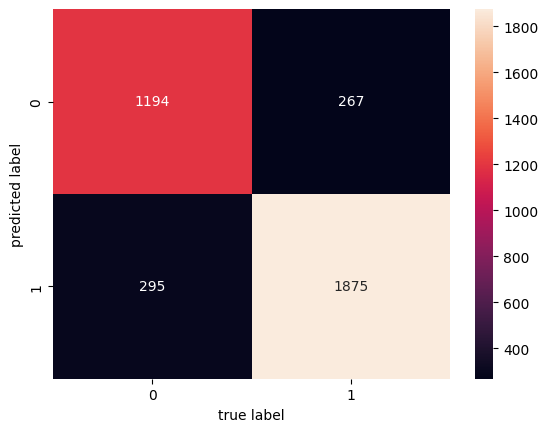

In [400]:
con_mat = confusion_matrix(validation_labels, predicted)
sns.heatmap(con_mat.T, annot=True, fmt='d')
plt.ylabel('predicted label');
plt.xlabel('true label');

Môžeme vidieť že algoritmus 1R dosiahol accuracy 85% čo hodnotíme ako veľmi úspešne, na to že je použitý iba jeden algoritmus.

<h2>2. Trénovanie a vyhodnotenie klasifikátorov strojového učenia</h2>
Porovnanie nami implementovaného oneR algoritmu, oproti stromovému algoritmu. 

In [401]:
data = tree.export_graphviz(clf, feature_names = test_class.columns, class_names = ["1","0"], filled = True, rounded = True,)
graph = graphviz.Source(data)
graph.format = 'png'
graph.render('tree',view=False)
Image(filename='tree.png') 

<b>Porovnanie:</b>

In [402]:
print("Metriky rule1 na validačnom datasete:\n\n")
rule1(test)

Metriky rule1 na validačnom datasete:


              precision    recall  f1-score   support

           0       0.56      0.43      0.49      1489
           1       0.66      0.77      0.71      2142

    accuracy                           0.63      3631
   macro avg       0.61      0.60      0.60      3631
weighted avg       0.62      0.63      0.62      3631



{'ALL': 3631, 'TP': 636, 'TN': 1647, 'FP': 495, 'FN': 853}

In [403]:
print("Metriky klasifikácie cez strom\n\n\n",classification_report(validation_labels, predicted, target_names = ["0","1"]))

Metriky klasifikácie cez strom


               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1489
           1       0.86      0.88      0.87      2142

    accuracy                           0.85      3631
   macro avg       0.84      0.84      0.84      3631
weighted avg       0.84      0.85      0.84      3631



<b>Vidíme teda že lepšie vyšlo keď bola použitá klasifikácia pomocou stromu, teda tam bola úspešnosť 85% zatiaľ čo nami implementovany oneR algoritmus 
dosiahol úspešnosť 63%</b>

<h1>Optimalizácia alias hyperparameter tuning</h1>
Snažíme sa nájsť hyperparametre na zlepšenie hodnoty úspešnosti daného klasifikátora. Hyperparametre sú parametre v klasifikátore rozhodovacieho stromu. Na demonštráciu riešenia spustíme len niekoľko testov. Úspešnosť daného klasifikátora možno zlepšiť zmenou parametrov na správnu kombináciu.


<br><b>Použité Hyperparametre</b>
1. max_depth(int | None, optional): určuje hĺbku stromu.
2. splitter(string,optional) - určuje ako sa bude rozdeľovať na uzloch stromu. Možnosti sú: best a random.
3. criterion(string, optional) - určuje mieru kvality rozdelenia. Jej hodnoty sú: gini a entropy
4. max_features(int,None) - určuje koľko stĺpcov sa bude brať do úvahu počas hľadania najoptimálnejšieho rozdelenia. 

<t>1. a 4. obsahovali range hodnôt</t>

<b>Použitá metóda</b>

Najskôr sme využili metódu GridSearchCV, ktorá nám vytvorí model pre každú kombináciu nami špecifikovaných parametrov. Parameter cv nám hovorí o počte vykonaných cross validácii.
Rozhodli sme sa pre metódu GridSearchCV. Vytvorí model, ktorý obsahuje všetky kombinácie daných parametrov. CV (crossvalidation) hovorí koľko bolo vykonaných krížových validácií. 

In [404]:
parameters = {'criterion': ('gini','entropy'), 'splitter': ('best','random'), 'max_features':range(1,19,1)}
optimization = GridSearchCV(clf, parameters, cv = 10,scoring = "accuracy")
result = optimization.fit(train_class, train_labels)
optimization.best_params_

{'criterion': 'entropy', 'max_features': 7, 'splitter': 'best'}

Najlepšia kombinácia hyperparametrov:

In [405]:
score = pd.DataFrame(optimization.cv_results_)
score.head(7)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.016059      0.002262         0.002194        0.000399   
1       0.008030      0.000562         0.002097        0.000297   
2       0.021826      0.002290         0.001904        0.000296   
3       0.007831      0.000652         0.001988        0.000014   
4       0.028630      0.002348         0.002088        0.000301   
5       0.008928      0.000958         0.002094        0.000299   
6       0.037343      0.002577         0.002194        0.000398   

  param_criterion param_max_features param_splitter  \
0            gini                  1           best   
1            gini                  1         random   
2            gini                  2           best   
3            gini                  2         random   
4            gini                  3           best   
5            gini                  3         random   
6            gini                  4           best   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_features': 1, 'spli...           0.724771   
1  {'criterion': 'gini', 'max_features': 1, 'spli...           0.667890   
2  {'criterion': 'gini', 'max_features': 2, 'spli...           0.730275   
3  {'criterion': 'gini', 'max_features': 2, 'spli...           0.711927   
4  {'criterion': 'gini', 'max_features': 3, 'spli...           0.809174   
5  {'criterion': 'gini', 'max_features': 3, 'spli...           0.792661   
6  {'criterion': 'gini', 'max_features': 4, 'spli...           0.838532   

   split1_test_score  ...  split3_test_score  split4_test_score  \
0           0.724771  ...           0.755963           0.741284   
1           0.642202  ...           0.594495           0.651376   
2           0.772477  ...           0.765138           0.779817   
3           0.722936  ...           0.721101           0.699083   
4           0.818349  ...           0.781651           0.781651   
5           0.770642  ...           0.768807           0.770642   
6           0.840367  ...           0.849541           0.822018   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.732110           0.762868           0.667279           0.704044   
1           0.689908           0.643382           0.647059           0.560662   
2           0.809174           0.762868           0.821691           0.819853   
3           0.693578           0.742647           0.748162           0.718750   
4           0.768807           0.772059           0.803309           0.825368   
5           0.733945           0.720588           0.790441           0.746324   
6           0.752294           0.819853           0.816176           0.825368   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.742647         0.731354        0.027318               67  
1           0.617647         0.637884        0.035876               72  
2           0.821691         0.784262        0.030319               62  
3           0.715074         0.715216        0.020007               69  
4           0.829044         0.800593        0.021483               58  
5           0.751838         0.757433        0.023903               66  
6           0.816176         0.821152        0.025277               45  

[7 rows x 21 columns]

Najlepšia kombinácia hyperparameterov keď sa odhadovalo:

In [406]:
optimization.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features=7)

Výsledná hodnota presnosti.

In [407]:
predicted = optimization.best_estimator_.fit(train_class, train_labels).predict(test_class)
print("Accuracy:", metrics.accuracy_score(validation_labels, predicted))

Accuracy: 0.8496282015973561
